<a href="https://colab.research.google.com/github/vanditaagarwal/Principal_Component_Analysis/blob/main/M20MA208_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(a) **First Part**

In [ ]:
# Importing Libraries

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the given Data

df = pd.read_csv(r"/content/test.csv")
df.head()
df.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
474,0.281420,-0.018490,-0.132998,-0.984476,-0.933728,-0.964322,-0.986333,-0.936348,-0.966002,-0.923222,...,-0.792688,0.023747,-0.168949,-0.831286,0.328294,-0.859001,0.137185,-0.076200,4.0,STANDING
475,0.271512,-0.018797,-0.086495,-0.981033,-0.911530,-0.929734,-0.983048,-0.911682,-0.927487,-0.921547,...,-0.836321,0.033556,0.022126,-0.596299,0.495521,-0.865281,0.138219,-0.070713,4.0,STANDING
476,0.270151,-0.006650,-0.070095,-0.980452,-0.898758,-0.931475,-0.982858,-0.892460,-0.933108,-0.921547,...,-0.731087,0.015106,0.270528,-0.192930,0.387918,-0.856896,0.137679,-0.077621,4.0,STANDING
477,0.275435,-0.006999,-0.107189,-0.980112,-0.908507,-0.930106,-0.982258,-0.905058,-0.926515,-0.913231,...,-0.945658,0.086488,-0.108326,0.815209,0.145002,-0.846453,0.133775,-0.087386,4.0,STANDING
478,0.275664,-0.017000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Initializing x and y

x=df.drop(['Activity'],axis=1)
x.head()

y=df['Activity']

y.replace(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'],
                        [0, 1, 2, 3, 4, 5], inplace=True)
truelabels=y.values

In [ ]:
# Normalizing features data 'x' using min-max normalization

x = (x - np.min(x))/(np.max(x)-np.min(x))
x.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.477793,0.386574,0.520737,0.047179,0.047855,0.248642,0.038726,0.046555,0.240552,0.030234,...,0.338445,0.161017,0.497977,0.582151,0.081046,0.639088,0.112658,0.855932,0.470379,0.0
1,0.544656,0.409623,0.379342,0.018261,0.018929,0.040243,0.010071,0.019124,0.039125,0.030234,...,0.456165,0.224624,0.452472,0.508036,0.278655,0.967907,0.125676,0.859944,0.444021,0.0
2,0.520223,0.380278,0.380602,0.003880,0.017422,0.026872,0.003718,0.017641,0.026025,0.003488,...,0.417451,0.198391,0.477025,0.602222,0.530253,0.575251,0.122896,0.858831,0.448650,0.0
3,0.508202,0.365332,0.381457,0.003158,0.015381,0.023608,0.002990,0.015266,0.022008,0.003873,...,0.330515,0.143744,0.486074,0.577828,0.669575,0.651875,0.125164,0.862391,0.450926,0.0
4,0.518712,0.376185,0.365200,0.003854,0.018937,0.015187,0.003962,0.020681,0.015740,0.003873,...,0.223103,0.080457,0.493583,0.478708,0.869742,0.441781,0.129148,0.868229,0.454232,0.0


In [ ]:
# Implementing Principal Component Analysis with 10 components
bool_series = pd.notnull(df)
# filtering data
# displaying data only with team = NaN
df[bool_series]
pca = PCA(n_components = 10)
pca.fit(x)
X = pca.transform(x)
X = pd.DataFrame(X,columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'])
X.head()

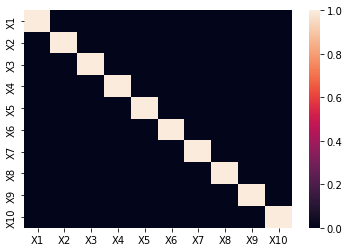

In [ ]:
#Checking Co-relation between features after PCA
sns.heatmap(X.corr())


Text(0, 0.5, 'Second Principal Component')

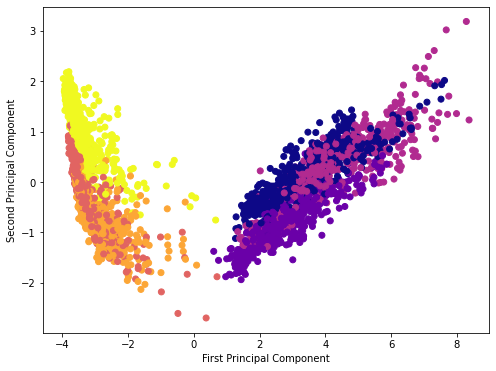

In [ ]:
# giving a larger plot
plt.figure(figsize =(8, 6))

Z=X.values

plt.scatter(Z[:, 0], Z[:, 1], c = y, cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
# Implementing Principal Component Analysis with 6 commponents
pca = PCA(n_components = 6)
pca.fit(x)
Y = pca.transform(x)
Y = pd.DataFrame(Y,columns=['Y1','Y2','Y3','Y4','Y5','Y6'])
Y.head()

,Y1,Y2,Y3,Y4,Y5,Y6
0,-1.908289,-0.685568,-0.163106,-0.131266,-0.120299,0.044046
1,-2.862216,-0.514105,-0.475566,-0.075820,0.019231,-0.248168
2,-3.201833,-0.124234,-0.805991,0.085392,0.042497,-0.040788
3,-3.259076,-0.233768,-0.847219,0.138470,0.295125,0.018076
4,-3.215892,-0.646203,-0.713265,0.043839,0.252730,0.093671


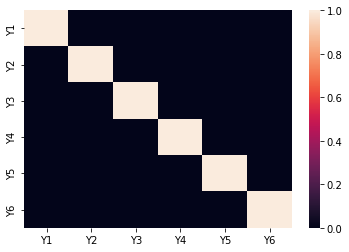

In [ ]:
#Checking Co-relation between features after PCA
sns.heatmap(Y.corr())

Text(0, 0.5, 'Second Principal Component')

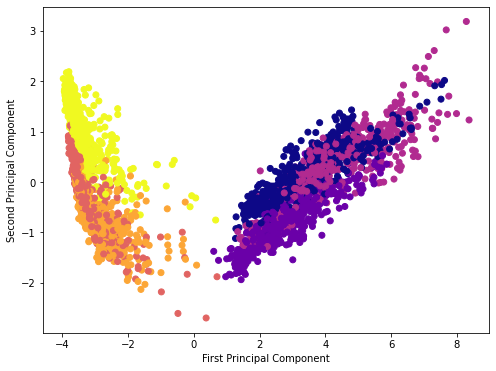

In [ ]:
# giving a larger plot
plt.figure(figsize =(8, 6))

Z=Y.values

plt.scatter(Z[:, 0], Z[:, 1], c = y, cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
# Implementing Principal Component Analysis with 6 commponents
pca = PCA(n_components = 11)
pca.fit(x)
Y = pca.transform(x)
Y = pd.DataFrame(Y,columns=['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11'])
Y.head()

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11
0,-1.908289,-0.685568,-0.163107,-0.131284,-0.120348,0.044059,0.170056,-0.700043,0.282788,-0.051362,-0.521777
1,-2.862216,-0.514105,-0.475567,-0.075828,0.019202,-0.248156,0.240350,-0.451007,0.169603,-0.043482,0.027537
2,-3.201833,-0.124234,-0.805991,0.085384,0.042478,-0.040780,0.035126,0.140306,0.181694,0.261137,0.078587
3,-3.259076,-0.233768,-0.847220,0.138467,0.295116,0.018084,-0.105333,0.241635,0.387216,0.348953,0.441915
4,-3.215892,-0.646203,-0.713265,0.043843,0.252738,0.093677,0.074493,0.536143,0.103626,0.332490,0.680999


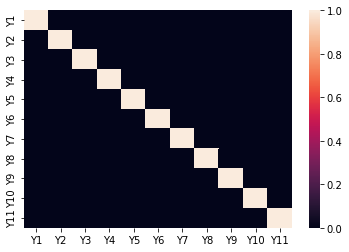

In [ ]:
#Checking Co-relation between features after PCA
sns.heatmap(Y.corr())

Text(0, 0.5, 'Second Principal Component')

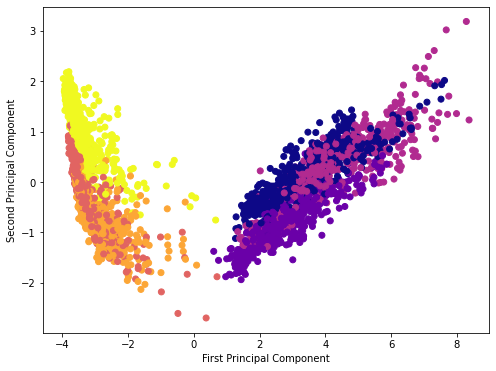

In [ ]:
# giving a larger plot
plt.figure(figsize =(8, 6))

Z=Y.values

plt.scatter(Z[:, 0], Z[:, 1], c = y, cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
a=x.values

In [ ]:
def p_c_a(X, k):

  m = np.size(X, axis=0) # Number of examples

  sigma = (1/m)*X.T.dot(X) # Covariance Matrix

  [U, S, V] = np.linalg.svd(sigma) # Singular Decomposition Value

  Ur = U[:, 0:k] # U reduce

  D = X.dot(Ur) # Projected data of k-dimensions

  return D, S

In [ ]:
def cumulativeVariance(S, k_range):

  var_ratio = np.zeros(k_range) # Cumulative explained variance ratio

  for i in range(k_range):
      var_ratio[i] = np.sum(S[0:i+1])/np.sum(S)

  return var_ratio

In [ ]:
k=561
D, S = p_c_a(a, k)

In [ ]:
n_features = a.shape[1]
print(n_features)

562


In [ ]:
k_range = n_features-1
var_ratio = cumulativeVariance(S, k_range)

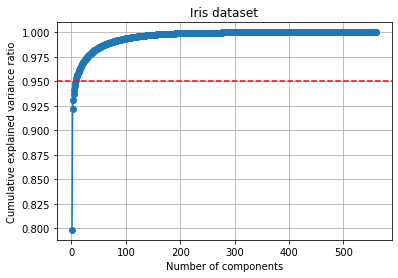

In [ ]:
threshold = 0.95 # Threshold of explained variance

n_components = np.arange(1, k+1)

plt.plot(n_components, var_ratio, marker='o')
plt.axhline(threshold, color='r', linestyle='--')
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Iris dataset')
plt.show()

In [ ]:
curr_ratio = var_ratio[var_ratio >= threshold][0]
curr_component = n_components[var_ratio == curr_ratio][0]

print('k = %d is the smallest value of k with cumulative explained variance ratio of %.4f, which is higher than the threshold of %.2f' %
      (curr_component, curr_ratio, threshold))

k = 8 is the smallest value of k with cumulative explained variance ratio of 0.9511, which is higher than the threshold of 0.95


(b) and (c) Second and Third Part

In [ ]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import math
style.use('ggplot')

In [ ]:
# Implementing Kmeans Clustering

class K_Means_Clustering:
	def __init__(self, k =3, tol = 0.0001, itr = 500):
		self.k = k
		self.tol = tol
		self.itr = itr

	def fit(self, X):

		self.centroids = {}

		# assigning first 'k' elements in the dataset as our initial centroids
		for i in range(self.k):
			self.centroids[i] = X[i]


		for i in range(self.itr):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			# calculating euclidean distance between the data points and centroids and selecting the nearest centroid
			# and based on that, assigning that data point to the nearest cluster
			for features in X:
				dist = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = dist.index(min(dist))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			# updating the centroid values by taking mean of all the cluster datapoints
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				new = self.centroids[centroid]

				if np.sum((new - original_centroid)/original_centroid * 100.0) > self.tol:
					isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				break

	def pred(self, X):
		dist = [np.linalg.norm(X - self.centroids[centroid]) for centroid in self.centroids]
		classification = dist.index(min(dist))
		return classification


In [ ]:
# Fitting data to the model for k=6 clusters

# I have performed K means clustering on feature set of size 10, which is 10, after dimensionality reduction

km = K_Means_Clustering(6)  # Since there are 3 classes in my dataset, so we would divide it into three clusters
km.fit(X.values)


In [ ]:
# Displaying centroids of k means for k=3 clusters

print(km.centroids)

{0: array([ 3.55658371e+00, -7.50992617e-02,  3.70021343e-02, -2.26928183e-02,
       -7.24573602e-02, -1.62781341e-02, -5.94642750e-02,  3.99565786e-04,
        4.39228552e-02, -3.16492086e-03]), 1: array([-2.99307379,  0.45422146,  1.41263218, -0.09820078,  0.05929092,
       -0.10848494,  0.41197443, -0.15530379, -0.06968973,  0.14805289]), 2: array([-3.60493103,  1.41502054,  0.69691229,  0.04178951, -0.16260198,
       -0.08321764, -0.25769108,  0.12994221, -0.00535428, -0.02166586]), 3: array([-3.50991881,  0.14848608, -0.91000147,  0.10765066,  0.18223509,
        0.16525035, -0.17421554,  0.06026106,  0.10659383,  0.02592104]), 4: array([-3.00896341, -0.69908655, -0.47671106,  0.00900369,  0.15491618,
        0.02477703,  0.20879837, -0.04495444, -0.09282085, -0.09014354]), 5: array([-1.62721983, -1.27265939,  0.22586231, -0.07761887, -0.03909999,
       -0.05521505,  0.3946112 , -0.1091841 , -0.30208422,  0.08569582])}


(c) part for k means with 6 clusters

In [ ]:
# Displaying the data points in each of three clusters

print(km.classes[0])
print(km.classes[1])
print(km.classes[2])
print(km.classes[3])
print(km.classes[4])
print(km.classes[5])


[array([ 2.14780235, -0.34853714, -0.02116232, -0.6447114 , -0.47322843,
       -0.63368031,  0.0373079 , -0.18073876,  0.36016158, -0.15851282]), array([ 2.46273717, -0.07929635, -0.30428752, -0.73264378, -0.58446691,
       -0.58978374, -0.0690075 , -0.18106328,  0.54684475,  0.26762105]), array([ 2.7839857 ,  0.12818664, -0.47558794, -0.81341901, -0.83358237,
       -0.97890417, -0.26655341, -0.44436184,  0.34650505,  0.62895246]), array([ 2.62112804, -0.10904263, -0.26772564, -0.61428696, -0.9167521 ,
       -1.09246909, -0.06722811, -0.50745268,  0.149449  ,  0.32591367]), array([ 1.99306452, -0.40585701,  0.01285557, -0.39243409, -0.72812039,
       -0.81471319, -0.17377787, -0.36775696,  0.44009424,  0.16506641]), array([ 2.17605505, -0.25867137, -0.13714269, -0.53637984, -0.72101033,
       -0.74993447, -0.26277053, -0.30719313,  0.45358298,  0.10830908]), array([ 2.31356167, -0.08412534, -0.29632378, -0.57792081, -0.80661666,
       -0.58913217, -0.31283159, -0.34773622,  0.63

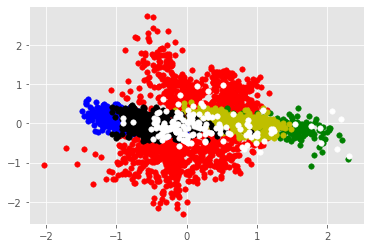

In [ ]:
# Plotting Clusters

colors = 10*["r", "g", "y", "b", "k","w"]

for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s = 130, color='b', marker = "o")

for classification in km.classes:
  color = colors[classification]
  for features in km.classes[classification]:
    plt.scatter(features[2], features[3], color = color,s = 30)

GMM

In [ ]:
#Importing Libraries

import numpy as np
import math
import pandas as pd
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#data


In [ ]:
# Implementing GMM using Expectation-Maximization

from scipy.stats import multivariate_normal

class GMM_Clustering:
    def __init__(self, k, itr=5):
        self.k = k
        self.itr = int(itr)
        self.weights = []
        self.pi = []

    def initialization(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape


        # giving prior probablities(initial weights) to each cluster and storing them in pi or P(Z_k=j)
        for i in range(self.k):
          self.pi.append(1 / self.k)
        #self.pi = np.full(shape=self.k, fill_value=1/self.k)

        # giving initial posterior probabilities(weights) to each data point wrt to each cluster or P(Zi=j/Xi)
        for i in range(self.k):
          self.weights.append(1 / self.k)
        #self.weights = np.full(shape=self.shape, fill_value=1/self.k)

        # now dividing dataset randomly into k parts of unequal sizes
        randomly_row = np.random.randint(low=0, high=self.n, size=self.k)

        # initializing values of mean of k Gaussians
        self.mu = [  X[row_index,:] for row_index in randomly_row ]

        # initializing values of covariance matrices of k Gaussians
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    # Expectation-Step: update weights and pi holding mu and sigma constant
    def expectation_step(self, X):
        # updating posterior probabilities P(Xi/Zi=j)
        self.weights = self.posterior_prob(X)
        # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster k or (pi)k
        self.pi = self.weights.mean(axis=0)
        print("weights are: ", self.weights)
        print("values of pi: ", self.pi)

    # Maximization-Step: update mu and sigma holding pi and weights constant
    def maximization_step(self, X):
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()

            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T,aweights=(weight/total_weight).flatten(), bias=True)
        print("means are: ", self.mu[i])
        print("covariances are: ", self.sigma[i])

    # To cluster data points
    def fit(self, X):
        # initializing parameters like weights, pi, mu, sigma of all Gaussians in dataset X
        self.initialization(X)
        plt.figure(figsize=(16, 25))

        for iteration in range(self.itr):
          permutation = np.array([mode(y[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])
          permuted_prediction = permutation[gmm.predict(X)]
          print('\nThe accuracy of the permuted prediction against target before iteration ',iteration+1,end="")
          print(': ',np.mean(y == permuted_prediction))
          print('\n')
          confusion_matrix(y, permuted_prediction)
          plt.title(' Iteration Cluster')
          plt.subplot(5,3,iteration+1)
          clusters=permuted_prediction
          plt.xlabel(y[0])
          plt.ylabel(y[1])
          plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
          plt.grid()
          plt.tight_layout()
          # iterate to update the value of P(Xi/Zi=j) and (pi)k
          self.expectation_step(X)
          # iterate to update the value of mu and sigma as the clusters shift
          self.maximization_step(X)


    # predicts posterior probability of each data point wrt each cluster
    def posterior_prob(self, X):
        # Creates a n*k matrix denoting probability of each point wrt each cluster
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(mean=self.mu[i],cov=self.sigma[i])
            # pdf : probability denisty function
            likelihood[:,i] = distribution.pdf(X)

        numerator = likelihood * self.pi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights

    # predict function
    def predict(self, X):
        weights = self.posterior_prob(X)
        # datapoint belongs to cluster with maximum probability
        # returns this value
        return np.argmax(weights, axis=1)

    def display(self, X):
      for i in self.k:
        print("mu: ", self.mu[i])
        print("Covariance: ", self.sigma[i])
        print("prior probabilities: ", self.pi[i])
        print("posterior probabilities: ", self.weights[i])

(c) third part for GMM


The accuracy of the permuted prediction against target before iteration  1:  0.49304377332880894


weights are:  [[1.05578252e-01 1.05973884e-01 4.09613390e-03 7.46356606e-01
  1.13306028e-03 3.68620649e-02]
 [8.18640167e-03 3.02246161e-02 6.56071644e-03 9.36317502e-01
  6.96742719e-04 1.80140213e-02]
 [1.49545036e-03 1.07862914e-01 1.61182793e-01 5.78952476e-01
  2.50864410e-04 1.50255503e-01]
 ...
 [3.07206247e-01 1.74491020e-01 1.43056875e-04 3.52309115e-01
  4.25523102e-03 1.61595329e-01]
 [6.14016508e-01 9.73386127e-02 4.57942824e-05 2.03746693e-01
  2.39766618e-03 8.24547261e-02]
 [6.42988794e-01 7.74987778e-02 5.96933848e-05 1.83967732e-01
  2.07742453e-02 7.47107579e-02]]
values of pi:  [0.0692105  0.12652902 0.15895863 0.40739397 0.04618719 0.19172069]
means are:  [ 1.68008969 -0.60216269  0.28493493  0.03470329  0.00996139  0.07066988
 -0.02012938  0.24185558  0.10581004  0.20807942]
covariances are:  [[ 6.81804459e+00  4.67554395e-01  1.84689309e-01  4.90164810e-02
   1.317

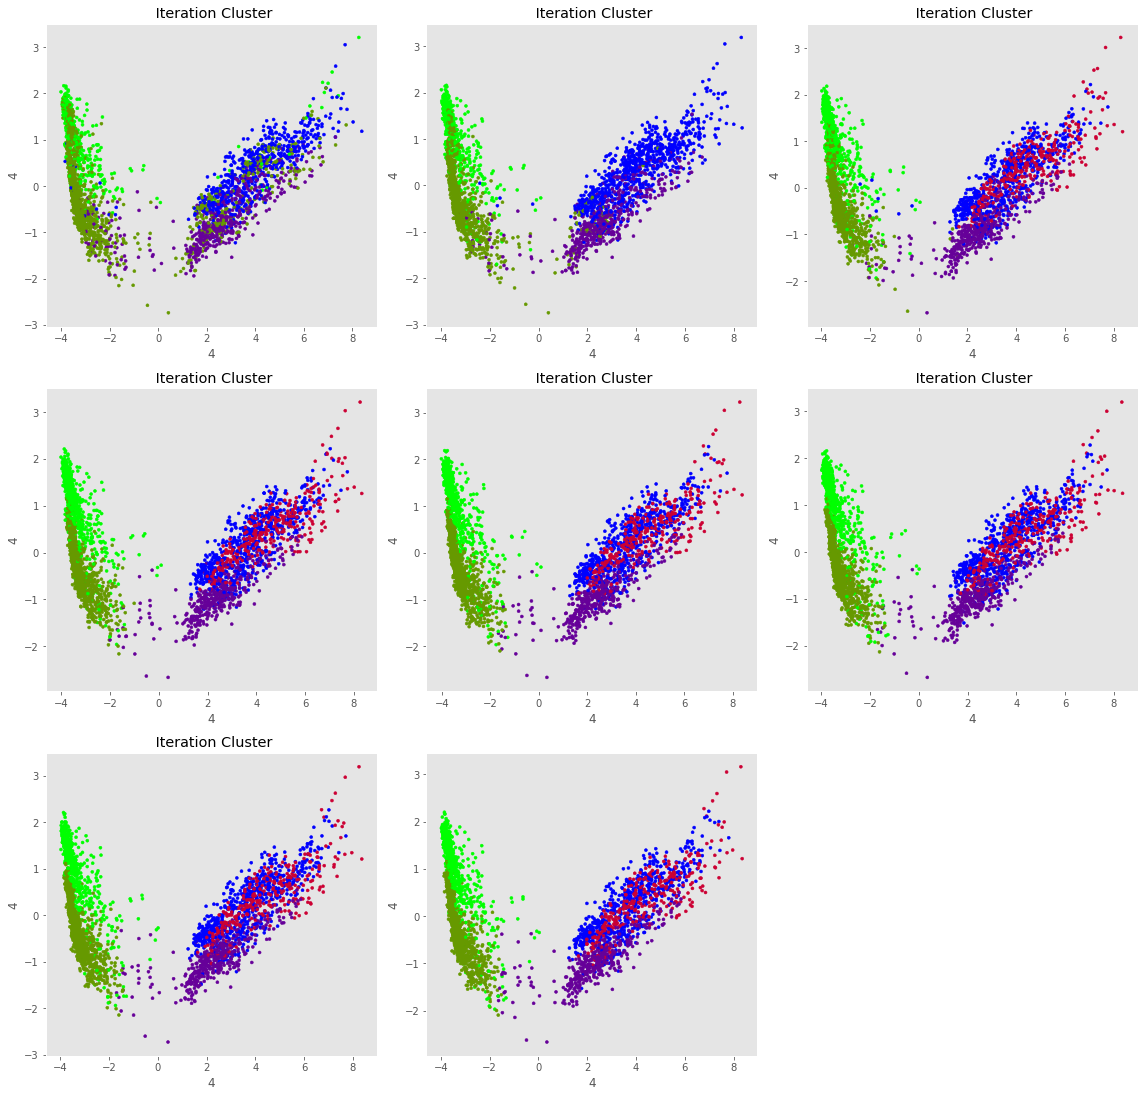

In [ ]:
# Fitting the dataset in GMM model and plotting clusters

# I have performed GMM clustering on feature set of size 10, which is 10, after dimensionality reduction

np.random.seed(42)
gmm = GMM_Clustering(k=6, itr=8)
gmm.fit(X.values)

In [ ]:
# Plotting

colors = 10*["r", "g", "b","w","b","k"]

def jitter(x):
  z = x + np.random.uniform(low=-0.05, high=0.05, size=x.shape)
  return z

def plot_axis_pairs(X, axis_pairs, clusters, classes):
    n_rows = len(axis_pairs) // 2
    n_cols = 2
    plt.figure(figsize=(16, 10))
    # iterates through all the plots
    for index, (x_axis, y_axis) in enumerate(axis_pairs):
        plt.subplot(n_rows, n_cols, index+1)
        plt.title('Final Cluster',fontsize=26)
        plt.xlabel(y[x_axis])
        plt.ylabel(y[y_axis])
        plt.scatter(jitter(X[:, x_axis]), jitter(X[:, y_axis]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
        plt.grid()
        plt.tight_layout()

permutation = np.array([
    mode(y[gmm.predict(X.values) == i]).mode.item()
    for i in range(gmm.k)])
permuted_prediction = permutation[gmm.predict(X.values)]

plot_axis_pairs(X.values, axis_pairs=[
        (0,1), (2,3),
        (0,2), (1,3) ],
    clusters=permuted_prediction,
    classes=y)

print(confusion_matrix(y, permuted_prediction))